# 01.3 Generalized Linear Model

### Boilerplate

In [1]:
import matplotlib.pyplot as plt
import torch

### Setup training data

In [2]:
k = 43      # classification amount
n = 50     # input feature count
m = 500    # training set

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

x = torch.rand(size=(m, n), dtype=torch.float32, device=device)
thetaTrue = torch.rand(size=(n, k), dtype = torch.float32, device=device)

eta = x @ thetaTrue

# probability, essentially true hypothesis
probs = torch.softmax(eta, dim=1, dtype=torch.float32)
yChoice = torch.multinomial(probs, num_samples=1)
y = torch.nn.functional.one_hot(yChoice.squeeze(1), num_classes=k).float()

theta = torch.zeros(size=(n, k), dtype=torch.float32, device=device)

# x, y, theta initialized
y, y.shape

(tensor([[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]),
 torch.Size([500, 43]))

### Some cannonical link functions

In [3]:
def softmax(matrix: torch.Tensor) -> torch.Tensor:
    return torch.softmax(matrix, dim=1, dtype=torch.float32)

def linear(matrix: torch.Tensor) -> torch.Tensor:
    return matrix

def logistic(matrix: torch.Tensor) -> torch.Tensor:
    return torch.sigmoid(matrix)

### Generalized GLM update rule

In [4]:
def glmUpdate(x: torch.Tensor, y: torch.Tensor, theta: torch.Tensor, alpha: float, link) -> torch.Tensor:
    m = y.shape[0]
    eta = x @ theta
    hypothesis = link(eta)
    error = y - hypothesis
    grad = x.T @ error
    return theta + alpha / m * grad

### Testing model

Epoch    0 | Loss: 3.5593
Epoch  500 | Loss: 1.9292
Epoch 1000 | Loss: 1.6267
Epoch 1500 | Loss: 1.4952
Epoch 2000 | Loss: 1.4190
Epoch 2500 | Loss: 1.3678
Epoch 3000 | Loss: 1.3302
Epoch 3500 | Loss: 1.3012
Epoch 4000 | Loss: 1.2778
Epoch 4500 | Loss: 1.2585
Epoch 5000 | Loss: 1.2421
Epoch 5500 | Loss: 1.2280
Epoch 6000 | Loss: 1.2157
Epoch 6500 | Loss: 1.2049
Epoch 7000 | Loss: 1.1952
Epoch 7500 | Loss: 1.1865
Epoch 8000 | Loss: 1.1786
Epoch 8500 | Loss: 1.1715
Epoch 9000 | Loss: 1.1649
Epoch 9500 | Loss: 1.1588
Epoch 10000 | Loss: 1.1532
Epoch 10500 | Loss: 1.1481
Epoch 11000 | Loss: 1.1432
Epoch 11500 | Loss: 1.1387
Epoch 12000 | Loss: 1.1345
Epoch 12500 | Loss: 1.1305
Epoch 13000 | Loss: 1.1267
Epoch 13500 | Loss: 1.1232
Epoch 14000 | Loss: 1.1198
Epoch 14500 | Loss: 1.1166
Epoch 15000 | Loss: 1.1136
Epoch 15500 | Loss: 1.1107
Epoch 16000 | Loss: 1.1079
Epoch 16500 | Loss: 1.1053
Epoch 17000 | Loss: 1.1028
Epoch 17500 | Loss: 1.1004
Epoch 18000 | Loss: 1.0981
Epoch 18500 | Loss: 1

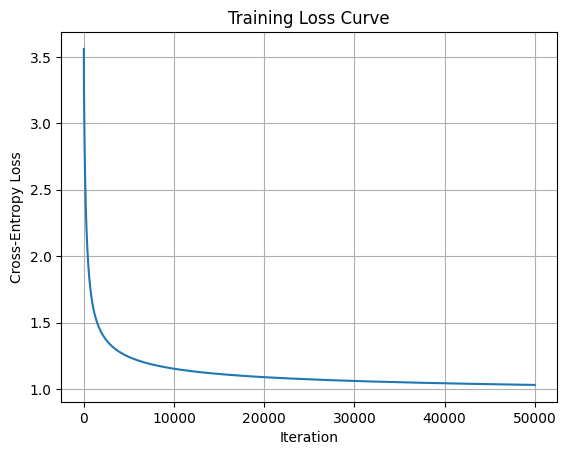

In [5]:
# Settings
alpha = 1
iterations = 50000
loss_history = []

# Cross-entropy loss for checking progress
def cross_entropy(y_true, y_pred):
    return -(y_true * torch.log(y_pred + 1e-9)).sum(dim=1).mean()

# Training loop
for i in range(iterations):
    theta = glmUpdate(x, y, theta, alpha, softmax)
    preds = softmax(x @ theta)
    loss = cross_entropy(y, preds)
    loss_history.append(loss.item())

    if i % 500 == 0:
        print(f"Epoch {i:4d} | Loss: {loss.item():.4f}")

# Plot loss
plt.plot(loss_history)
plt.title("Training Loss Curve")
plt.xlabel("Iteration")
plt.ylabel("Cross-Entropy Loss")
plt.grid(True)
plt.show()